In [1]:
## Dependencies
from NanTex_backend.data_postprocessing.oneiros import Oneiros

In [2]:
# set up the dreamer
Dreamer = Oneiros.with_ground_truth(data_type = 'npy',
                                    DEBUG=True)

Loading data...
Loading npy data...
Setting up metadata...
Checking outpath...
Retrieving outpath...


In [3]:
Dreamer.metadata

{'feature_cleanup_threshodls': {'feature_1': 0.1,
  'feature_2': 0.1,
  'feature_3': 0.1},
 'dynamic_thresholds': {'upper': 3, 'lower': -2},
 'patch_size': (256, 256),
 'dream_memory_shape': None,
 'patch_array_shape': None,
 'standardize': True,
 'normalize': False,
 'tensortype': torch.float32,
 'weights_only': True}

In [4]:
## Test Pre-Processing
Dreamer.__pre_process_data__()

Pre-processing data...
Adjusting image size...
Stripping images...
Standardizing images...
Memorizing patch array shape...
Patchifying images...
Reshaping images...


In [4]:
## Grab model
from NanTex_backend.deep_learning.dl_model_assembly import assembled_model
assembled_model.keys()

dict_keys(['model', 'activation', 'loss_fn', 'optimizer', 'device', 'writer'])

In [5]:
## Load model
Dreamer.setup_model(model=assembled_model['model'],
                    activation=assembled_model['activation'],
                    device=assembled_model['device'],
                    state_dict_path=None)
Dreamer.load_weights(None)

Setting up model...
To load pre-trained weights, call the 'load_weights' method.
Setting up model...
Loading weights...
Checking path...
Fetching weights...
Checking path...
Setting up model...


In [5]:
Dreamer.quickstart_model()

Quickstarting model...
Checking path...
Setting up model...
Fetching weights...
Checking path...
Setting up model...
Memorizing dream shape...


In [6]:
Dreamer.__offload_data_to_device__()

Offloading data...


In [7]:
Dreamer.metadata

{'feature_cleanup_threshodls': {'feature_1': 0.1,
  'feature_2': 0.1,
  'feature_3': 0.1},
 'dynamic_thresholds': {'upper': 3, 'lower': -2},
 'patch_size': (256, 256),
 'dream_memory_shape': {'dream_0': (225, 3, 256, 256)},
 'patch_array_shape': {'dream_0': (15, 15)},
 'standardize': True,
 'normalize': False,
 'tensortype': torch.float32,
 'weights_only': True}

In [8]:
Dreamer.__go_to_sleep__()

Dreaming of nature...:   0%|          | 0/1 [00:00<?, ?it/s]

Currently at dream_0...:   0%|          | 0/225 [00:00<?, ?it/s]

In [9]:
Dreamer.__unpatchify_imgs__()

Unpatchifying images...


AssertionError: The patches dimension is not equal to the original image size

In [13]:
Dreamer.data_out['dream_0'].shape

(225, 3, 256, 256)

In [46]:
from patchify import patchify, unpatchify
self = Dreamer

def __unpatchify_imgs__(self):
    if self.DEBUG:
        print('Unpatchifying images...')
    for key, patches in self.data_out.items():
        self.data_out[key] = {
                                f"feature_{i}" : unpatchify(patches = patches[:,i,:,:].reshape(*self.metadata['patch_array_shape'][key],
                                                                                               *self.metadata['patch_size']),
                                                            imsize = self.data_in[key].shape[1:]) 
                                for i in range(patches.shape[1])
                                  }

In [47]:
__unpatchify_imgs__(Dreamer)

Unpatchifying images...


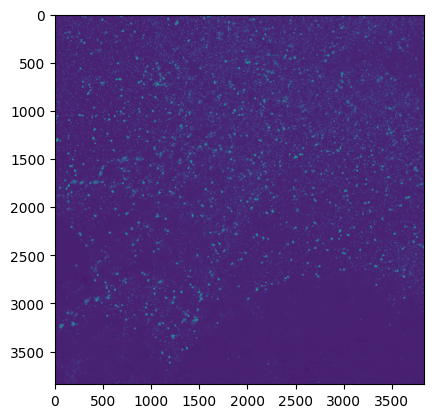

In [51]:
plt.imshow(Dreamer.data_out['dream_0']['feature_2'])

In [12]:
self.data_in['dream_0'].shape

(4, 3840, 3840)

In [13]:
self.data_out['dream_0'].shape

(225, 3, 256, 256)

In [38]:
shape_1 = (3840, 3840)
shape_2 = (15,15,256,256)

In [16]:
test_out = Dreamer.data_out['dream_0']
test_out_cut = test_out[:,0,:,:]
test_out_cut.shape

(225, 256, 256)

In [23]:
15*256

3840

In [31]:
patchify(Dreamer.data_in['dream_0'][0], (256,256), step=256).shape

(15, 15, 256, 256)

In [36]:
Dreamer.data_in['dream_0'][0].shape

(3840, 3840)

In [32]:
np.reshape(test_out_cut, (15, 15, 256, 256)).shape

(15, 15, 256, 256)

In [35]:
shape_1

(3840, 3840)

In [40]:
test_out_cut.reshape(shape_2)

(15, 15, 256, 256)

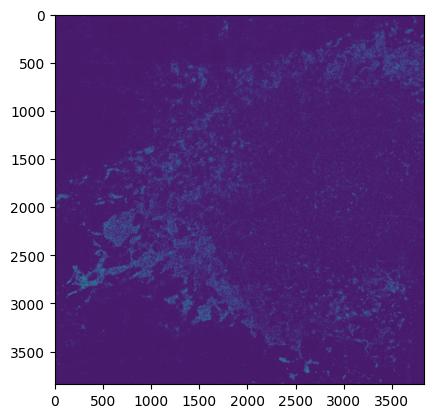

In [43]:
import matplotlib.pyplot as plt
plt.imshow((unpatchify(patches = test_out_cut.reshape(shape_2), imsize = shape_1)))

In [25]:
import numpy as np
unpatchify(patches=np.reshape(test_out_cut, (15, 15, 256, 256)), imsize=shape_1)

AssertionError: The patches dimension is not equal to the original image size

In [22]:
import numpy as np
np.sqrt(225*256)

240.0

In [16]:
__unpatchify_imgs__(Dreamer)

Unpatchifying images...


AssertionError: The patches dimension is not equal to the original image size

TypeError: Invalid shape (3, 256, 256) for image data

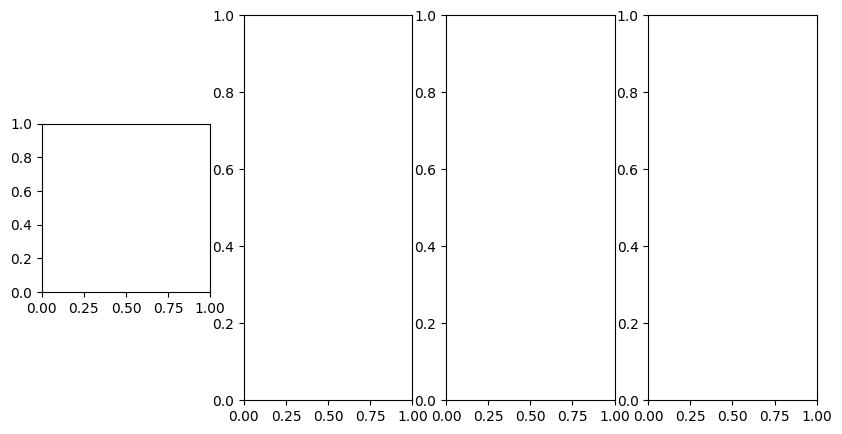

In [9]:
## show the results
import matplotlib.pyplot as plt

dream:str = 'dream_0'

fig, axs = plt.subplots(1, 4, figsize=(10, 5))

for i, ax in enumerate(axs):
    ax.imshow(Dreamer.data_out[dream][i])
    ax.axis('off')
    ax.set_title(f'Layer {i+1}')